# Presentación

## Introducción

**TUIA - Aprendizaje Automático 1** - 2023

---

**Trabajo Práctico Integrador** - "Predicción de lluvia en Australia"

**Alumnos:**  

*   Brisa Menescaldi
*   Miguel Mussi



## Objetivo


Familiarizarse con la librería scikit-learn y las herramientas que brinda para el pre-procesamiento de datos, la implementación de modelos y la evaluación de métricas, y con TensorFlow para el entrenamiento de redes neuronales.

## Dataset



El dataset se llama weatherAUS.csv y contiene información climática de Australia de los últimos diez años, incluyendo si para el día siguiente llovió o no y la cantidad de lluvia en las columnas ‘RainTomorrow’ y ‘RainfallTomorrow’. El objetivo es la predicción de estas dos variables en función del resto de las características que se consideren adecuadas.

Tiene una columna ‘Location’ que indica la ciudad y el objetivo es predecir la condición de lluvia en las ciudades de Sydney, SydneyAirport, Canberra, Melbourne y MelbourneAirport (costa sureste). Pueden considerarse como una única ubicación. Descartar el resto de los datos.

## Consignas





1. Armar grupos de hasta dos personas para la realización del trabajo práctico. Dar aviso al cuerpo docente del equipo. En caso de no tener compañero, informar al cuerpo docente.


2. Realizar un análisis descriptivo, que ayude a la comprensión del problema, de cada una de las variables involucradas en el problema detallando características, comportamiento y rango de variación.
Debe incluir:

> * Análisis y decisión sobre datos faltantes
* Visualización de datos (por ejemplo histogramas, scatterplots entre variables, diagramas de caja)
* ¿Está balanceado el dataset?
* Codificación de variables categóricas (si se van a utilizar para predicción).
* Matriz de correlación
* Selección de características para la predicción.
* Estandarización de datos.


3. Implementar la solución del problema de regresión con regresión lineal múltiple.

> * Probar con el método LinearRegression.
* Probar con métodos de gradiente descendiente.
* Probar con métodos de regularización (Lasso, Ridge, Elasticnet).
* Obtener las métricas adecuadas (entre R2 Score, MSE, RMSE, MAE, MAPE).


4. Implementar la solución del problema de clasificación con regresión logística.

> * Obtener las métricas adecuadas (entre Accuracy, precision, recall, F1 Score, ROC-AUC, entre otras).


5. Implementar las soluciones con una red neuronal.

> * Obtener las métricas adecuadas.


6. Mejorar la selección de hiperparámetros.

> * Probar validación cruzada.


7. MLOps (a definir).


8. Escribir una conclusión del trabajo

# Desarrollo

## Análisis descriptivo

In [1]:
#@title Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#@title Sincronización con Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#@title DataFrame
file_path= '/content/drive/MyDrive/UNR/4 - Aprendizaje Automático (IA41)/Trabajo Práctico/weatherAUS.csv'
df = pd.read_csv(file_path, sep=',', engine='python')

In [10]:
df

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145407,145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,0.0
145408,145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,0.0
145409,145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,0.0
145410,145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

In [12]:
df.isna().sum()

Unnamed: 0              0
Date                    0
Location                0
MinTemp              1484
MaxTemp              1253
Rainfall             3260
Evaporation         62754
Sunshine            69796
WindGustDir         10316
WindGustSpeed       10253
WindDir9am          10562
WindDir3pm           4226
WindSpeed9am         1767
WindSpeed3pm         3061
Humidity9am          2653
Humidity3pm          4505
Pressure9am         15061
Pressure3pm         15024
Cloud9am            55870
Cloud3pm            59336
Temp9am              1766
Temp3pm              3607
RainToday            3260
RainTomorrow         3259
RainfallTomorrow     3259
dtype: int64

In [9]:
df.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,145412.000000,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,72728.184393,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,41990.722236,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,36362.750000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,72727.500000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,109093.250000,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,145458.000000,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [13]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
Unnamed: 0,1.000000,0.067312,0.101069,-0.018000,0.061573,0.077380,0.048440,0.072230,0.048541,-0.142057,-0.085761,-0.102439,-0.106680,-0.063400,-0.064887,0.110598,0.089030,-0.018003
MinTemp,0.067312,1.000000,0.736499,0.103888,0.466954,0.072573,0.177448,0.174977,0.175209,-0.232739,0.006198,-0.451021,-0.461338,0.078818,0.021746,0.901788,0.708830,0.124709
MaxTemp,0.101069,0.736499,1.000000,-0.075064,0.587912,0.470151,0.067612,0.014387,0.050277,-0.504043,-0.508843,-0.332071,-0.427189,-0.289345,-0.277860,0.887192,0.984499,-0.044272
Rainfall,-0.018000,0.103888,-0.075064,1.000000,-0.064383,-0.227560,0.133651,0.087310,0.057873,0.224468,0.255791,-0.168151,-0.126528,0.198566,0.172448,0.011115,-0.079733,0.308547
Evaporation,0.061573,0.466954,0.587912,-0.064383,1.000000,0.365612,0.203010,0.193063,0.129387,-0.504087,-0.390242,-0.270357,-0.293575,-0.183826,-0.182654,0.545088,0.572872,-0.043519
Sunshine,0.077380,0.072573,0.470151,-0.227560,0.365612,1.000000,-0.034743,0.005526,0.053831,-0.490834,-0.629127,0.041964,-0.019727,-0.675329,-0.703918,0.291180,0.490496,-0.294983
WindGustSpeed,0.048440,0.177448,0.067612,0.133651,0.203010,-0.034743,1.000000,0.605280,0.686291,-0.215054,-0.026355,-0.458720,-0.413723,0.071759,0.109238,0.150169,0.032745,0.162918
WindSpeed9am,0.072230,0.174977,0.014387,0.087310,0.193063,0.005526,0.605280,1.000000,0.519578,-0.270830,-0.031665,-0.228674,-0.175737,0.025064,0.054647,0.128452,0.004500,0.069378
WindSpeed3pm,0.048541,0.175209,0.050277,0.057873,0.129387,0.053831,0.686291,0.519578,1.000000,-0.145521,0.016432,-0.296315,-0.255398,0.053363,0.025441,0.163052,0.027754,0.049229
Humidity9am,-0.142057,-0.232739,-0.504043,0.224468,-0.504087,-0.490834,-0.215054,-0.270830,-0.145521,1.000000,0.666955,0.139393,0.186799,0.452350,0.357307,-0.471266,-0.498320,0.172473


<ipython-input-16-40076fe0ef50>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.drop(['Unnamed: 0'], axis=1).corr()


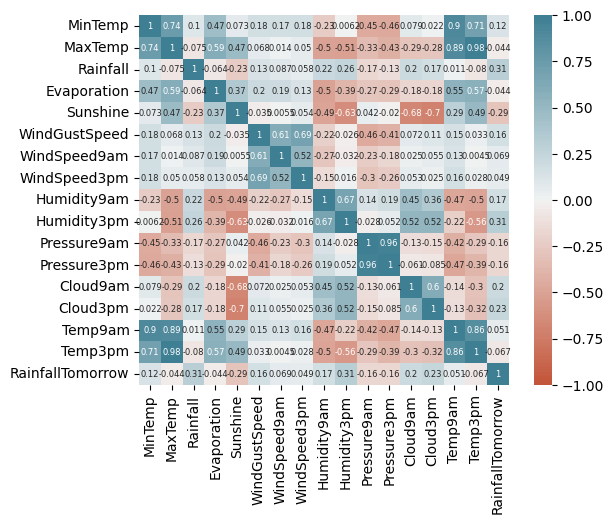

In [16]:
corr = df.drop(['Unnamed: 0'], axis=1).corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='center'
)
plt.show()